# Import Package

In [1]:
# openCV
import cv2 as cv

# basic
import numpy as np
import matplotlib.pyplot as plt

# Spatial Filtering Method

In [15]:
class SpatialFilter():
    def __init__(self, img):
        self.img = img
        self.output = np.zeros((self.img.shape))
    
    def padding(self, img, pad, border_type='reflect'):
        '''
        # padding method: same padding
        # reflected-padding: pad the reflected pixel around the border
        # zero-padding: pad the 0 (black) around the border
        '''
        if border_type == 'reflect':
            return cv.copyMakeBorder(img, top=pad, bottom=pad, left=pad, right=pad, borderType=cv.BORDER_REFLECT)
        return cv.copyMakeBorder(img, top=pad, bottom=pad, left=pad, right=pad, borderType=cv.BORDER_CONSTANT, value=0)
    
    def kernel_map(self, img, kernel_size, pad, x, y):
        '''
        # this method is the feature of the kernel mapping
        e.g.,
        y ↑
          | (x-1, y-1) ∥ (x, y-1) ∥ (x+1, y-1)
          | ===================================
          | (x-1,   y) ∥ (x,   y) ∥ (x+1,   y)
          | ===================================
          | (x-1, y+1) ∥ (x, y+1) ∥ (x+1, y+1)
          ----------------------------------------> x
        # Hot Spot(0, 0)
        (-1, -1)  | (0, -1) | (1, -1)
        (-1,  0)  | (0,  0) | (1,  0)
        (-1,  1)  | (0,  1) | (1,  1)
        '''
        return [ img[x+i][y+j] for i in range(-pad, kernel_size-pad) for j in range(-pad, kernel_size-pad) ]
    
    def convolve(self, img, kernel):
        return np.dot(img, kernel)

    def mean_blur(self, kernel_size):
        '''
        ## variables:
        ## output: the result after convolving the original image
        ## kernel_size:  the size of the n x n filter
        ## pad: the number of the add border around the image.
        '''
        kernel = np.full_like(np.ones((kernel_size, kernel_size)), 1/(kernel_size**2))
        row, col = self.img.shape
        
        pad = kernel_size // 2 
        pad_img = self.padding(self.img, pad)
        
        for x in range(row):
            for y in range(col):
                # get the feature map after padding the original image
                kernel_map = np.array(self.kernel_map(pad_img, kernel_size, pad, x, y))
                # covolve the image and kernel with inner product
                self.output[x][y] = self.convolve(kernel_map, kernel.flatten())
                
        return self.output
    
    def median_blur(self, kernel_size):
        '''
        ## variables:
        ## output: the result after convolving the original image
        ## kernel_size:  the size of the n x n filter
        ## pad: the number of the add border around the image
        ## median_index: the index of the filter median
        '''
        row, col = self.img.shape
        
        # calculate pad
        pad = kernel_size // 2
        # padding image (default reflection mode)
        pad_img = self.padding(self.img, pad)
        # calculate median index
        median_index = (kernel_size**2) // 2
        
        # median filtering
        for x in range(row):
            for y in range(col):
                # get the feature map after padding the original image
                kernel_map = self.kernel_map(pad_img, kernel_size, pad, x, y)
                # sorting the feature and select median
                self.output[x][y] = sorted(kernel_map)[median_index]
        return self.output

# Read Image

In [16]:
if __name__ == '__main__':
    # gauss_noisy_image.jpg
    # salt_pepper_noisy_image.jpg
    noisy_img = cv.imread('gauss_noisy_image.jpg', cv.IMREAD_GRAYSCALE)

# Spatial Filtering

In [17]:
    filter_type = int(input('Please input spatial filtering:\n1.Mean filters\n2.Median filters\n'))
    spatial_filter = SpatialFilter(noisy_img)
    
    noisy_title, filter_title, filter_fname, compare_fnam = 'Gaussian Noise', '', '', ''
    if filter_type == 1:
        filter_title = 'Mean Filtering'
        filter_fname = 'mean_filter'
        compare_fname = filter_fname + '_image'
        filter_img = spatial_filter.mean_blur(kernel_size=3)
    elif filter_type == 2:
        filter_title = 'Median Filtering'
        filter_fname = 'median_filter'
        compare_fname = filter_fname + '_image'
        filter_img = spatial_filter.median_blur(kernel_size=3)

Please input spatial filtering:
1.Mean filters
2.Median filters
 1


# Show Filtering Image

True

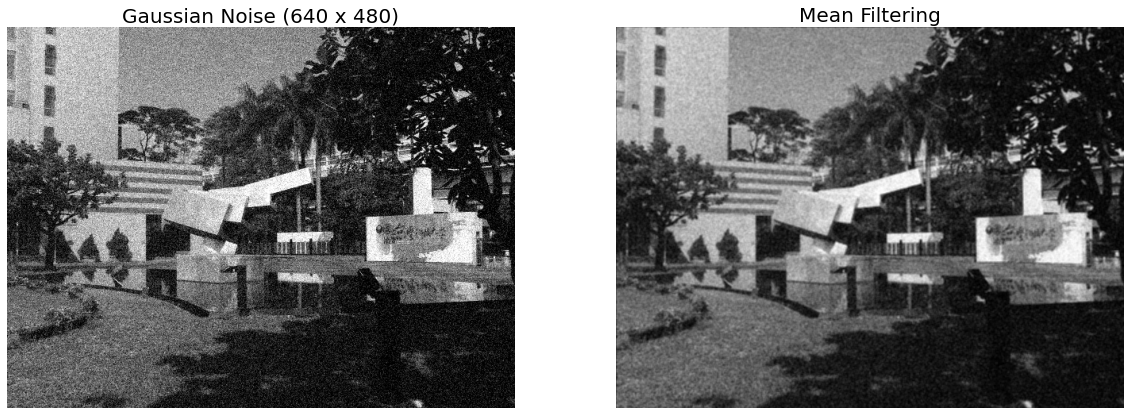

In [18]:
    plt.figure(figsize=(20, 20))

    plt.subplot(1,2,1)
    plt.title('%s (%s x %s)' % (noisy_title, noisy_img.shape[1], noisy_img.shape[0]), fontsize=20)
    plt.imshow(noisy_img, plt.cm.gray)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(filter_title, fontsize=20)
    plt.imshow(filter_img, plt.cm.gray)
    plt.axis('off')
    
    # plt.show()
    plt.savefig(filter_fname+'.jpg')
    cv.imwrite(compare_fname+'.jpg', filter_img)